In [18]:
import operator
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [19]:
#Cargamos la base de datos que usaremos 
Hurtos = pd.read_csv('/content/drive/MyDrive/TEORIA & LOGICA/Copia de robos.csv')
Hurtos

,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
0,01/01/2017,5,ANTIOQUIA,5001,MEDELLIN,21
1,01/01/2017,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
2,01/01/2017,5,ANTIOQUIA,5045,APARTADO,1
3,01/01/2017,5,ANTIOQUIA,5088,BELLO,4
4,01/01/2017,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...,...
241104,01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
241105,01/01/2023,85,CASANARE,85001,YOPAL,6
241106,01/01/2023,85,CASANARE,85010,AGUAZUL,1
241107,01/01/2023,85,CASANARE,85250,PAZ DE ARIPORO,2


In [20]:
Hurtos.set_index("FECHA HECHO", inplace=True) #Se pone como la primera columna la FECHA HECHO
Hurtos

,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
FECHA HECHO,,,,,
01/01/2017,5,ANTIOQUIA,5001,MEDELLIN,21
01/01/2017,5,ANTIOQUIA,5042,SANTAFE DE ANTIOQUIA,1
01/01/2017,5,ANTIOQUIA,5045,APARTADO,1
01/01/2017,5,ANTIOQUIA,5088,BELLO,4
01/01/2017,5,ANTIOQUIA,5154,CAUCASIA,1
...,...,...,...,...,...
01/01/2023,76,VALLE DEL CAUCA,76892,YUMBO,3
01/01/2023,85,CASANARE,85001,YOPAL,6
01/01/2023,85,CASANARE,85010,AGUAZUL,1


***1. Realizar la comparación de hurtos entre Medellín, Bogotá y Cali para el año 2020 y sacar tres conclusiones***

In [21]:
Hurtos.index = pd.to_datetime(Hurtos.index) # Se convierte el Dataframe en un indice de tipo datetime para poder trabajar rangos de fechas 
Hurtos.index
Hurtos_2020 = Hurtos.query("`FECHA HECHO` >= '2020-01-01' and `FECHA HECHO` <= '2020-12-31'") # Se selecionan las hurtos para el año 2020
Hurtos_2020

<ipython-input-21-22376c5a1852>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Hurtos.index = pd.to_datetime(Hurtos.index) # Se convierte el Dataframe en un indice de tipo datetime para poder trabajar rangos de fechas


,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,CANTIDAD
FECHA HECHO,,,,,
2020-01-01,5,ANTIOQUIA,5001,MEDELLIN,86
2020-01-01,5,ANTIOQUIA,5040,ANORI,1
2020-01-01,5,ANTIOQUIA,5079,BARBOSA,1
2020-01-01,5,ANTIOQUIA,5088,BELLO,14
2020-01-01,5,ANTIOQUIA,5129,CALDAS,2
...,...,...,...,...,...
2020-12-31,76,VALLE DEL CAUCA,76520,PALMIRA,2
2020-12-31,76,VALLE DEL CAUCA,76892,YUMBO,1
2020-12-31,81,ARAUCA,81001,ARAUCA,1


In [22]:

# Se determinan los municipios que se van a comparar
MUNICIPIOS = ['MEDELLIN','BOGOTA, D.C.','CALI']

filtro = Hurtos_2020['MUNICIPIO'].isin([MUNICIPIOS[0], MUNICIPIOS[1], MUNICIPIOS[2]])# Se realiza el filtro con los valores especificos que se necesitan
#usamos isin para selecionar los valores especificos de la columna 
comparacion = Hurtos_2020.loc[filtro]



In [23]:
# se obtiene la tabla de hurtos del año 2020 para los datos selecionados
Tabla_Hurtos_2020 = comparacion.groupby('MUNICIPIO')['CANTIDAD'].agg(['sum'])
Tabla_Hurtos_2020.sort_values('sum', ascending=False)

,sum
MUNICIPIO,
"BOGOTA, D.C.",83156
MEDELLIN,17780
CALI,13531


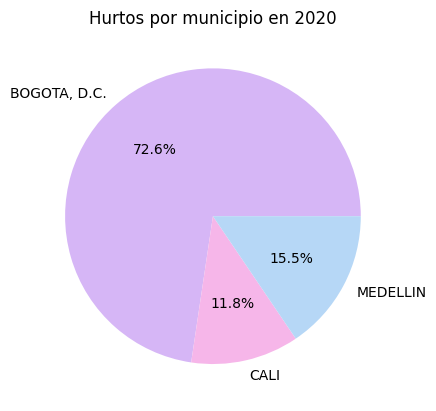

In [24]:
valores = Tabla_Hurtos_2020['sum']
etiquetas = Tabla_Hurtos_2020.index
Colores = ["#D6B6F6","#F6B6E9","#B6D7F6"]

# Crear el gráfico de pastel
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', colors=Colores) #Se definen las caracteristicas de la grafica, autopct se usa para mostrar los porcentajes con un decimal
plt.title('Hurtos por municipio en 2020')

plt.show()

*CONCLUSIONES*

1. Bogota es el Municipio con mas hurtos registrados en el año 2020, tiene un total de 83156, lo que representa un 72.6%  del total de los hurtos registrados en el 2020 en las 3 ciudades mas grandes de Colombia.
2. Aunque la grafica se realizo con la informacion ontenida, no son del todo correctos los porcentajes, esto debido a que no se esta teniendo en cuenta la densidad poblacional.
3. Cali es el municipio donde menos Hurtos se registraron, esto se puede  deber a su densidad poblacional, sin embargo no se cuenta con la información para definir esto. 

***2. En cuál departamento, ignorando Bogotá, se presentó más hurtos para marzo 2019.***

In [25]:
#Se crea el nuevo dataframe con los datos de hurtos de marzo del 2019
Hurtos_2019 = Hurtos.query("`FECHA HECHO` >= '2019-03-01' and `FECHA HECHO` <= '2022-03-31'")

In [26]:
# Definir el departamento a excluir
excluir = 'BOGOTA, D.C.'

# Filtrar el DataFrame para seleccionar todos los departamentos excepto el que se desea excluir
filtro = f"MUNICIPIO != '{excluir}'"
datos_seleccionados = Hurtos_2019.query(filtro)

# Agregar los valores de cantidad por departamento
tabla_departamentos = datos_seleccionados.groupby('DEPARTAMENTO')['CANTIDAD'].agg(['sum'])

print(tabla_departamentos.sort_values('sum', ascending=False))

                       sum
DEPARTAMENTO              
ANTIOQUIA           105141
VALLE DEL CAUCA      72465
CUNDINAMARCA         46671
ATLÁNTICO            43800
SANTANDER            32904
BOLÍVAR              19390
TOLIMA               18134
NARIÑO               16690
META                 15703
HUILA                15292
CAUCA                13451
NORTE DE SANTANDER   12636
MAGDALENA            11676
CESAR                11381
RISARALDA            10841
BOYACÁ                8685
QUINDÍO               7431
CÓRDOBA               6022
SUCRE                 5903
CALDAS                5828
LA GUAJIRA            5489
CASANARE              4769
CAQUETÁ               3357
CHOCÓ                 2046
ARAUCA                1297
PUTUMAYO               921
SAN ANDRÉS ISLAS       889
AMAZONAS               364
GUAVIARE               245
GUAINÍA                234
VICHADA                182
VAUPÉS                  70


In [27]:
# se obtiene el valor maximo con el departamento 
fila_maxima = tabla_departamentos.loc[tabla_departamentos['sum'].idxmax()]

# Imprimir la fila y el valor máximo
print(fila_maxima)
print('Valor máximo:', tabla_departamentos['sum'].max())

sum    105141
Name: ANTIOQUIA, dtype: int64
Valor máximo: 105141


Exeptuando Bogota, el departamento con mas hurtos en marzo del 2019 es Antioquia.

***3. Investigar cuál fue la población por departamento para el año 2022. Ingresarlo como diccionario y realizar la división a través de Pandas entre cantidad de hurtos por departamento y población. ¿Qué da como resultado esto? Realizar el diagrama que usted considere más conveniente para mostrar los resultados.***

In [28]:
#Se crea el Dataframe para el año 2022
Hurtos_2022 = Hurtos.query("`FECHA HECHO` >= '2022-01-01' and `FECHA HECHO` <= '2022-12-31'")

In [29]:
Año2022 = Hurtos_2022.groupby(['DEPARTAMENTO'])['CANTIDAD'].sum()# selecionamos las variables de relevancia 
Año2022

DEPARTAMENTO
AMAZONAS                 163
ANTIOQUIA              41374
ARAUCA                   450
ATLÁNTICO              21003
BOGOTÁ D.C.           136802
BOLÍVAR                 7887
BOYACÁ                  3590
CALDAS                  1793
CAQUETÁ                 1479
CASANARE                2346
CAUCA                   5536
CESAR                   5197
CHOCÓ                    819
CUNDINAMARCA           22644
CÓRDOBA                 2420
GUAINÍA                   67
GUAVIARE                 113
HUILA                   7668
LA GUAJIRA              2142
MAGDALENA               5868
META                    6878
NARIÑO                  7538
NORTE DE SANTANDER      4653
PUTUMAYO                 429
QUINDÍO                 3261
RISARALDA               5265
SAN ANDRÉS ISLAS         381
SANTANDER              13743
SUCRE                   2304
TOLIMA                  7848
VALLE DEL CAUCA        31997
VAUPÉS                    28
VICHADA                   58
Name: CANTIDAD, dtype: int64

In [30]:
#Creamos el diccionario con la información investigada
Poblacion = {
    'AMAZONAS': 83808,
    'ANTIOQUIA': 6994792,
    'ARAUCA': 308301,
    'ATLÁNTICO': 2835509,
    'BOGOTÁ D.C.': 7968095,
    'BOLÍVAR': 2258929,
    'BOYACÁ': 1267378,
    'CALDAS': 1046418,
    'CAQUETÁ': 423857,
    'CASANARE': 444602,
    'CAUCA': 1528076,
    'CESAR': 1359719,
    'CHOCÓ': 557654,
    'CUNDINAMARCA': 3577177,
    'CÓRDOBA': 1868166,
    'GUAINÍA': 52627,
    'GUAVIARE': 92281,
    'HUILA': 1149598,
    'LA GUAJIRA': 1015909,
    'MAGDALENA': 1476665,
    'META': 1088749,
    'NARIÑO': 1631117,
    'NORTE DE SANTANDER': 1658835,
    'PUTUMAYO': 374042,
    'QUINDÍO': 577543,
    'RISARALDA': 988091,
    'SAN ANDRÉS ISLAS': 65663,
    'SANTANDER': 2340657,
    'SUCRE': 981727,
    'TOLIMA': 1350060,
    'VALLE DEL CAUCA': 4622132,
    'VAUPÉS': 51133,
    'VICHADA': 116944
}

df_Poblacion = pd.DataFrame(Poblacion.items(), columns=['Departamento', 'Poblacion'])
print(type(Poblacion))
df_Poblacion

<class 'dict'>


,Departamento,Poblacion
0,AMAZONAS,83808
1,ANTIOQUIA,6994792
2,ARAUCA,308301
3,ATLÁNTICO,2835509
4,BOGOTÁ D.C.,7968095
5,BOLÍVAR,2258929
6,BOYACÁ,1267378
7,CALDAS,1046418
8,CAQUETÁ,423857
9,CASANARE,444602


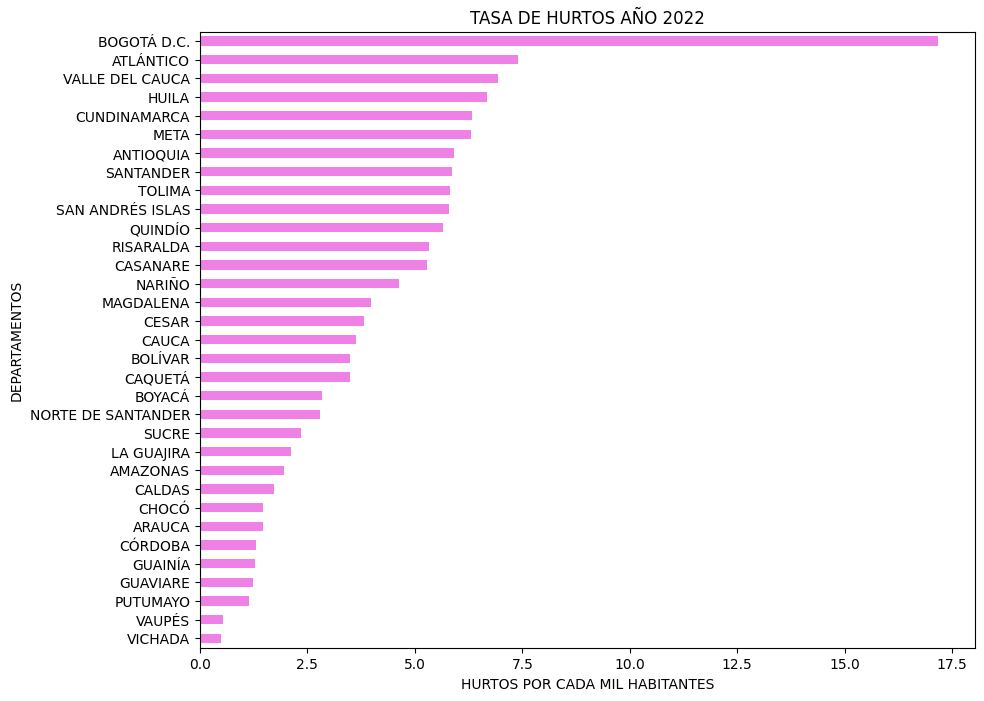

In [31]:
Tasa_Hurtos = {}
for clave in Poblacion:
  Tasa_Hurtos[clave] = (Año2022[clave]/Poblacion[clave])*1000

Tasa_Hurtos = dict(sorted(Tasa_Hurtos.items(), key=operator.itemgetter(1)))
Tasa_Hurtos = pd.Series(Tasa_Hurtos)

# Gráfico de barras horizontal para mostrar los resultados
ax = Tasa_Hurtos.plot(kind='barh', color='#EE80E6', figsize=(10,8))
ax.set_xlabel('HURTOS POR CADA MIL HABITANTES')
ax.set_ylabel('DEPARTAMENTOS')
ax.set_title('TASA DE HURTOS AÑO 2022')
plt.show()